In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import odeint

#1
Para analizar el moviiento del bloque se plantea el siguiente sistema de ecuaciones:

$$\frac{\mathrm{d}x}{\mathrm{d}t}=v$$

$$\frac{\mathrm{d}v}{\mathrm{d}t}=\frac{\mu N-kx}{m}$$


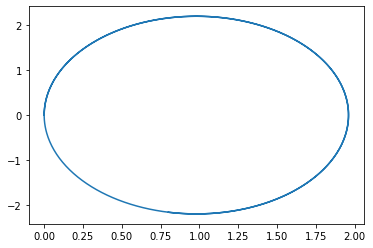

In [26]:
def dU(U, t, mu=0.5, m=.2, k=1, g=9.8):
  N=m*g
  return [U[1],
          (mu*N-k*U[0])/m]

U0=[0,0]
t=np.linspace(0,5,1000)

Us=odeint(dU,U0,t)

plt.plot(Us[:,0],Us[:,1])

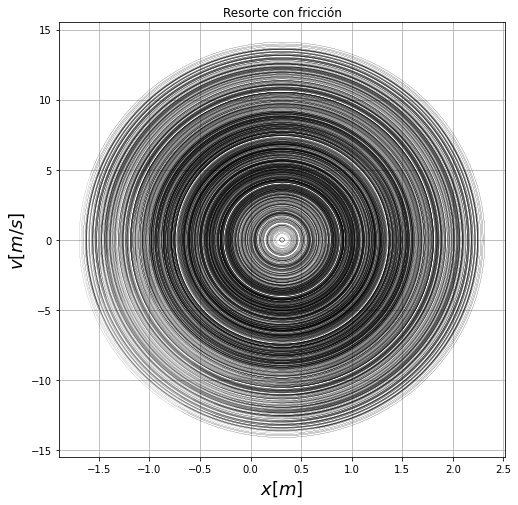

In [27]:
Nic = 1000

xs = np.random.uniform(-5,5,Nic)
vs = np.random.uniform(-5,5,Nic)

j=0
plt.figure( figsize = (8,8) )
for x, v in zip(xs, vs):
    t=np.linspace(0,5,400)
    U0=[x,v]
    Us=odeint(dU,U0,t)
    plt.plot(Us[:,0]/np.pi,Us[:,1],lw = 0.1, color = "black" )

plt.xlabel( "$x[m]$", fontsize = 18 )
plt.ylabel( "$v[m/s]$", fontsize = 18 )
plt.title( "Resorte con fricción" )
plt.grid(1)    

# 2

$$N(t)=N_0e^{-\lambda t}$$
con $$\lambda = \frac{\ln{2}}{\tau}$$

In [ ]:
datos=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
datos.rename(columns={'N(t)':'N'},inplace=True)
datos

,t,N
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


## a)

Despejando se tiene que:

$$\tau = \frac{\ln{2}}{\lambda}$$

In [ ]:
def N(t,N0,λ):
  return N0*np.exp(-λ*t)

N0, λ = curve_fit(N,datos.t,datos.N)[0]
Δλ = curve_fit(N,datos.t,datos.N)[1][-1][-1]

τ=np.log(2)/λ
Δτ= (np.log(2)/(λ**2))*Δλ 

print('La vida media es de ', τ.round(5), '+/- ', Δτ.round(5) )

La vida media es de  27.64367 +/-  0.00023


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


##b)

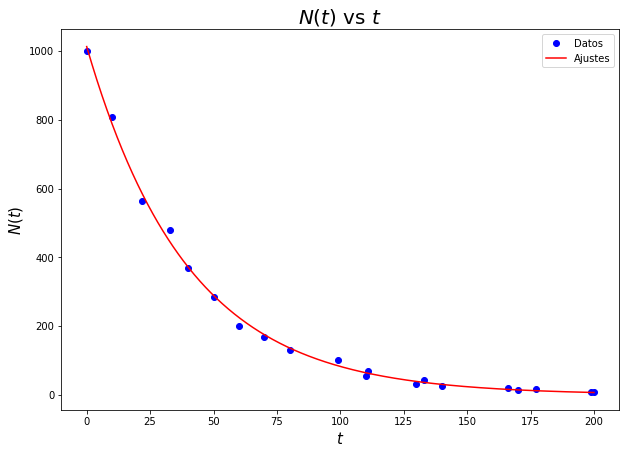

In [ ]:
ti=np.linspace(datos.t[0],list(datos.t)[-1],1000)

plt.figure(figsize=(10,7))
plt.title('$N(t)$ vs $t$',size=20)
plt.xlabel('$t$',size=15)
plt.ylabel('$N(t)$',size=15)
plt.plot(datos.t,datos.N,'ob',label='Datos')
plt.plot(ti,N(ti,N0,λ),'r',label='Ajustes')
plt.legend()
plt.show()

In [ ]:
curve_fit(N,datos.t,datos.N)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1.01295013e+03, 2.50743577e-02]),
 array([[1.34310233e+02, 3.25783544e-03],
        [3.25783544e-03, 2.09515051e-07]]))